# imports

In [ ]:
%autosave 30

Autosaving every 30 seconds


In [ ]:
# install requirements
!pip install opendatasets
!pip install pandas
!pip install seaborn
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0e5ce19a12154fbe1af1d3f06a2bade641695b7470ca1f91973b05885d95f5ea
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import pandas as pd
import opendatasets as od
import pandas
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import threading
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
#markmilad
#901bc409ae01ab03ee17f8c4242c65fa
od.download("https://www.kaggle.com/datasets/divaniazzahra/mental-health-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: markmilad
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/divaniazzahra/mental-health-dataset


100%|██████████| 2.34M/2.34M [00:00<00:00, 107MB/s]

# Data Analysis & preprocessing

Importing and Cleaning the dataset

In [ ]:
df = pd.read_csv('mental-health-dataset/Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


Checking for nulls in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
print("before removing nulls: ")
df.isnull().sum()

before removing nulls: 


Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
print("after removing nulls: ")
print(df.isnull().sum())

after removing nulls: 
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


## checking for duplicates

In [ ]:
# check for dupicates
df.duplicated().any()

True

In [ ]:
print("before removing duplicates : ", df.shape)
df.drop_duplicates(inplace = True)
print("after removing duplicates : ", df.shape)

before removing duplicates :  (287162, 17)
after removing duplicates :  (286808, 17)


In [ ]:
df.duplicated().any()

False

In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
print("distribution of data ")
summary_stats = df.describe()
print(summary_stats)

distribution of data 
                  Timestamp  Gender        Country Occupation self_employed  \
count                286808  286808         286808     286808        286808   
unique                  721       2             35          5             2   
top     2014-08-27 12:54:11    Male  United States  Housewife            No   
freq                    780  235950         167819      65173        257661   

       family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
count          286808    286808       286808         286808         286808   
unique              2         2            5              3              3   
top                No       Yes    1-14 days          Maybe            Yes   
freq           173527    144501        62429          98225         107579   

       Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
count                 286808      286808           286808        286808   
unique                     3           3 

Exporting the new cleaned dataset

In [ ]:
df.to_csv('Cleaned Mental Health Dataset.csv', index=False)


##Reading and preprocessing

In [ ]:
df=pd.read_csv("Cleaned Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


##Insight

Unique values in columns

In [ ]:
value_counts_per_column = {
    column: df[column].value_counts().to_dict()
    for column in df.columns if column != "Timestamp"
}

# Print the value counts
pprint.pprint(value_counts_per_column)


{'Changes_Habits': {'Maybe': 93237, 'No': 85992, 'Yes': 107579},
 'Coping_Struggles': {'No': 151373, 'Yes': 135435},
 'Country': {'Australia': 6014,
             'Belgium': 821,
             'Bosnia and Herzegovina': 390,
             'Brazil': 2340,
             'Canada': 17529,
             'Colombia': 390,
             'Costa Rica': 390,
             'Croatia': 390,
             'Czech Republic': 390,
             'Denmark': 780,
             'Finland': 390,
             'France': 2340,
             'Georgia': 390,
             'Germany': 4680,
             'Greece': 780,
             'India': 2771,
             'Ireland': 5542,
             'Israel': 1560,
             'Italy': 1560,
             'Mexico': 390,
             'Moldova': 390,
             'Netherlands': 5891,
             'New Zealand': 1991,
             'Nigeria': 390,
             'Philippines': 390,
             'Poland': 821,
             'Portugal': 390,
             'Russia': 780,
             'Singapore': 780,

#### Observations
- USA is the most country that data was collected from followed by the United Kingdom (might be due to population or mental health awareness) (59%)
- In the `mental_health_interview` column 79% of the individuals answered `no`
- The individuals that are __not self employed__ are far more than the self employed ones (88%)
- Most of the individuals in the dataset are **males** (82%)
- The rest of the columns have **fairly distributede categories**



### Is the dataset balanced regarding seeking treatment?

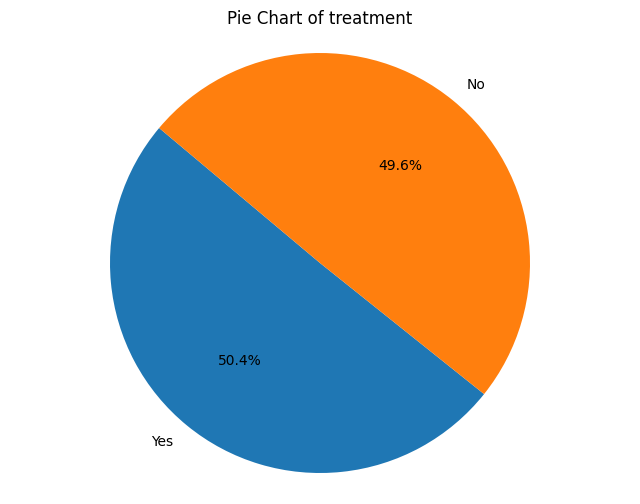

In [ ]:
# target column
counts = df['treatment'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of treatment")
plt.axis('equal')
plt.show()

#### Observations
- Now we notice that the dataset is balanced
  - So we don't need to handle unbalanced data

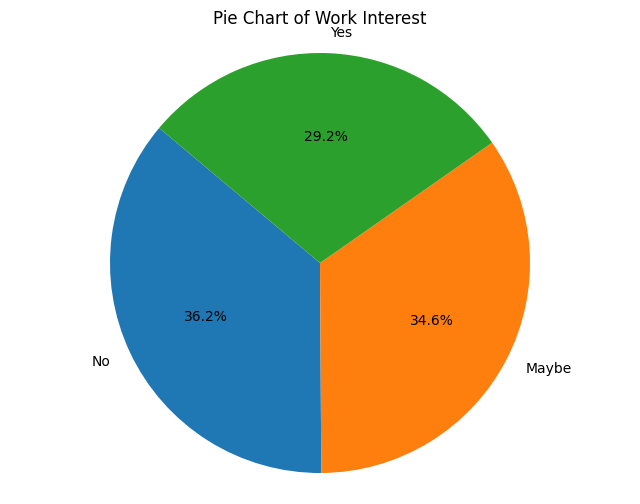

In [ ]:
counts = df['Work_Interest'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Work Interest")
plt.axis('equal')
plt.show()

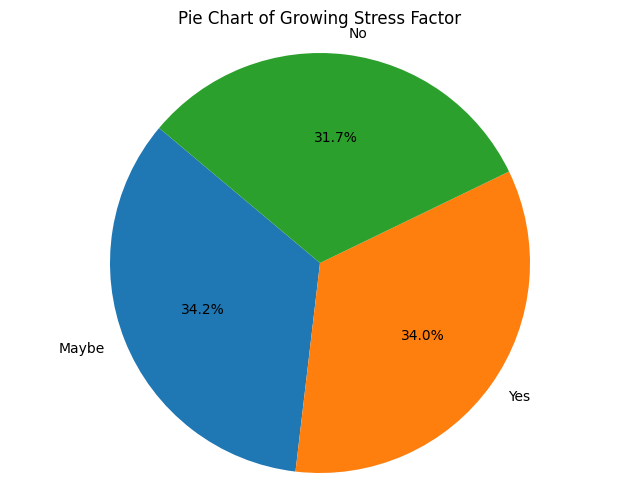

In [ ]:
counts = df['Growing_Stress'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Growing Stress Factor")
plt.axis('equal')
plt.show()

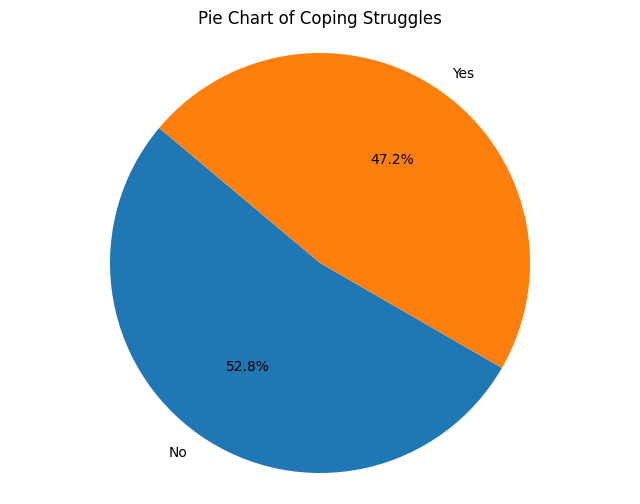

In [ ]:
counts = df['Coping_Struggles'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Coping Struggles")
plt.axis('equal')
plt.show()

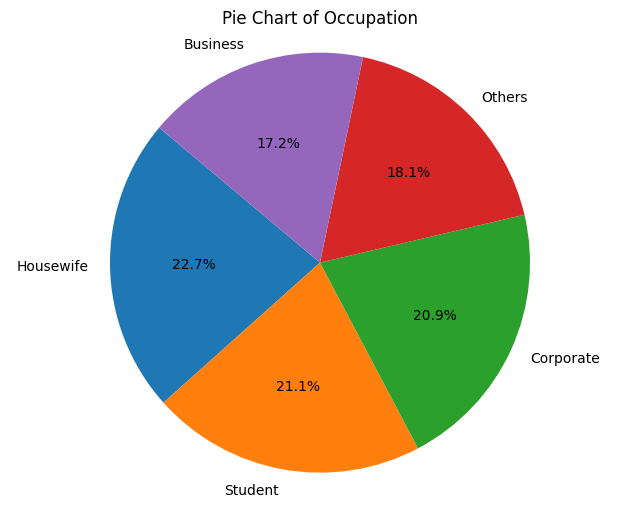

In [ ]:
# target
counts = df['Occupation'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Occupation")
plt.axis('equal')
plt.show()

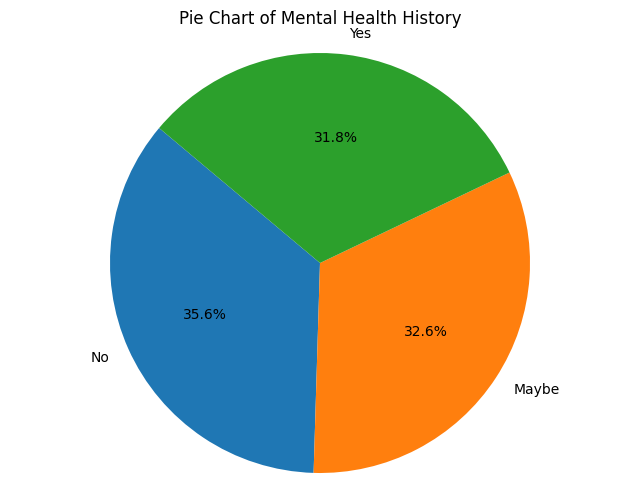

In [ ]:
counts = df['Mental_Health_History'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Mental Health History")
plt.axis('equal')
plt.show()

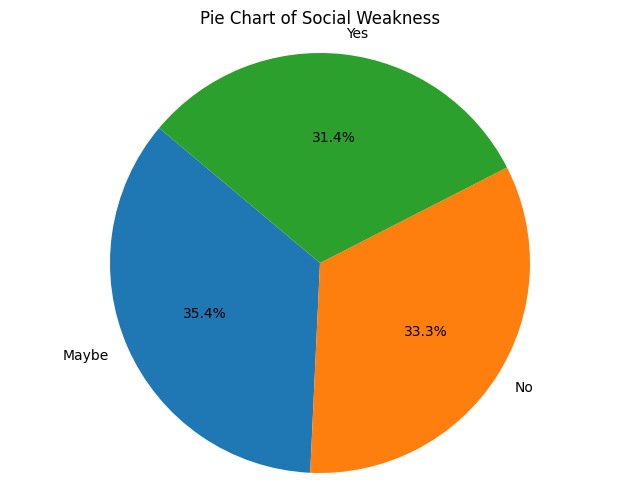

In [ ]:
counts = df['Social_Weakness'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Social Weakness")
plt.axis('equal')
plt.show()

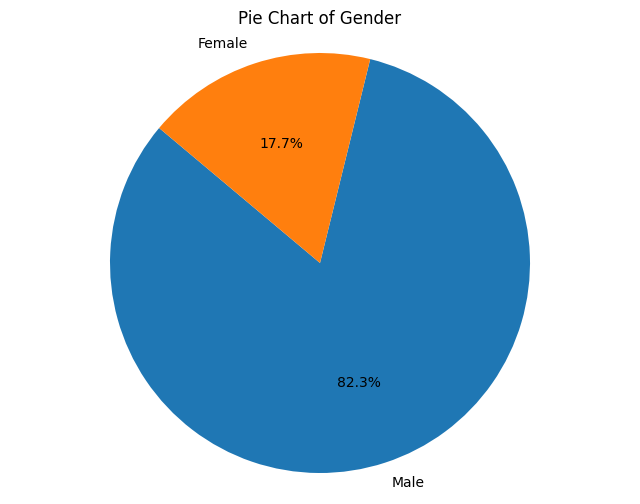

In [ ]:
counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Gender")
plt.axis('equal')
plt.show()

### Is there correlation between gender and seeking treatment?

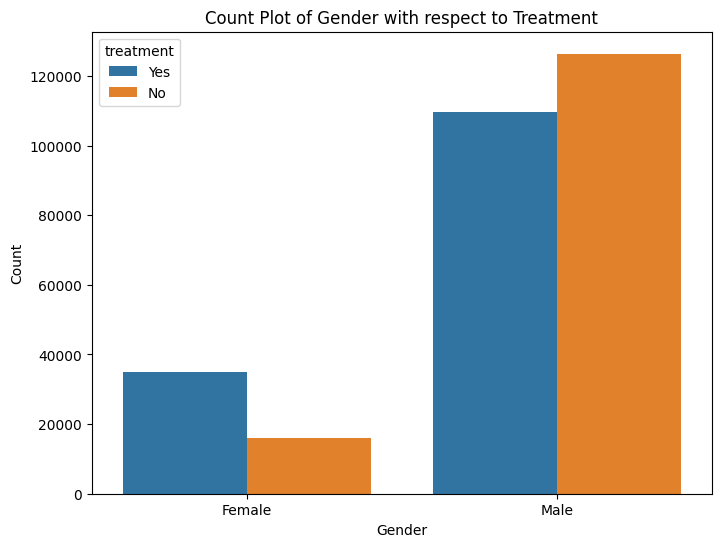

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Count Plot of Gender with respect to Treatment")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


#### Observations
- There are more males than females in the dataset
- Females tend to seek treatment more than males in the dataset


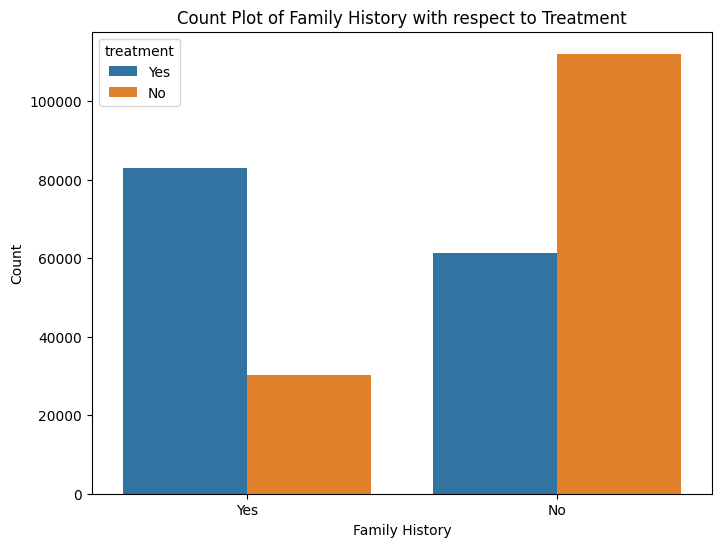

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title("Count Plot of Family History with respect to Treatment")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.show()


### Is family history releated to personal mental health history?

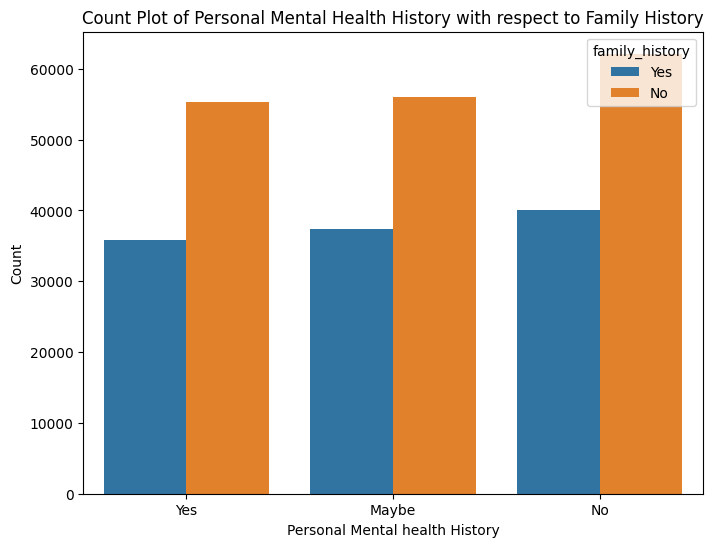

In [ ]:

plt.figure(figsize=(8, 6))
order = ["Yes", "Maybe", "No"]
sns.countplot(data=df, x='Mental_Health_History', hue='family_history', order = order)
plt.title("Count Plot of Personal Mental Health History with respect to Family History")
plt.xlabel("Personal Mental health History")
plt.ylabel("Count")
plt.show()


#### Observations
- We noticed here that the number of people who have mental health history are **less likely** to have family history
  - This was logically unexpected from the dataset

### which percentage of people seek treatment in the USA (the most common country)

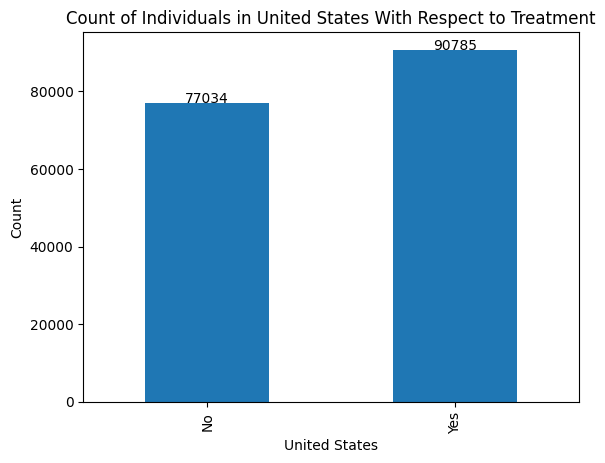

In [ ]:
filtered_df = df[df['Country'] == 'United States']

category_counts = filtered_df.groupby('treatment')['treatment'].count()

# Plot the result
category_counts.plot(kind='bar')
plt.xlabel('United States')
plt.ylabel('Count')
plt.title('Count of Individuals in United States With Respect to Treatment')
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.1, str(count), ha='center')
plt.show()

#### Observations
- Most of the individuals in the United States Seek treatment
  - but the numbers are relativly close so it won't skew the dataset much

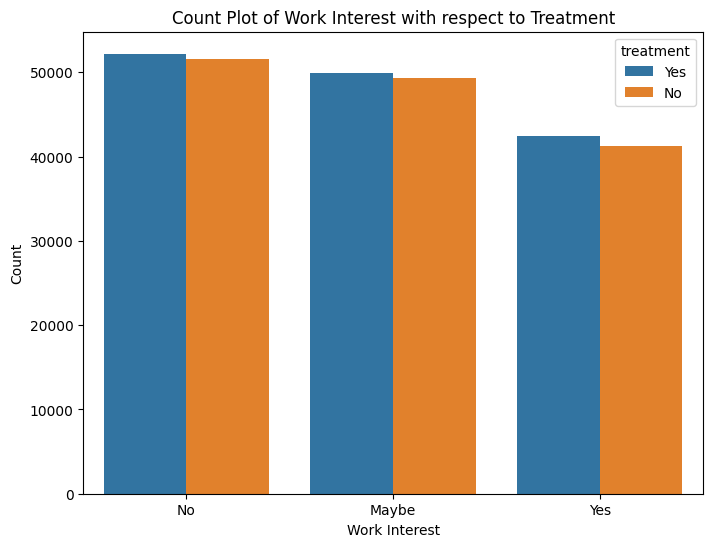

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Work_Interest', hue='treatment')
plt.title("Count Plot of Work Interest with respect to Treatment")
plt.xlabel("Work Interest")
plt.ylabel("Count")
plt.show()


### Exploring mood swings with changing habits

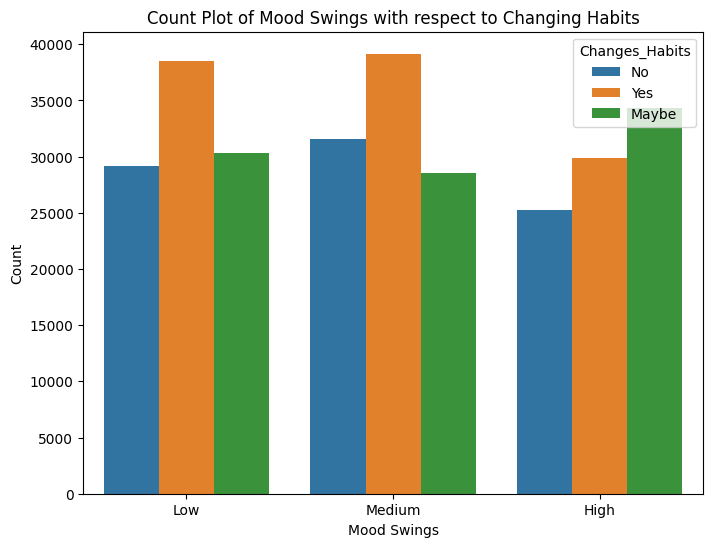

In [ ]:

plt.figure(figsize=(8, 6))
order = ['Low', 'Medium', 'High']
sns.countplot(data=df, x='Mood_Swings', hue='Changes_Habits', order = order)
plt.title("Count Plot of Mood Swings with respect to Changing Habits")
plt.xlabel("Mood Swings")
plt.ylabel("Count")
plt.show()



- Mood swings are somewhat correlated with Changing Habits
  - But as we see in the `High` column the `Maybe` category is the highest
  - This can show that Mood swings and changing habits are somewhat correlated but changing habits is not the decisive factor in this

In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


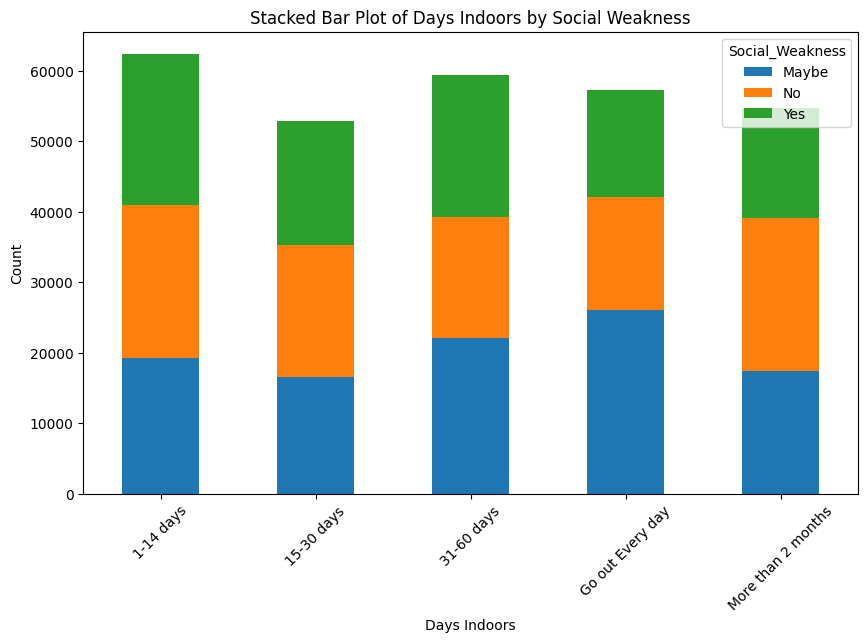

In [ ]:
cross_table = pd.crosstab(df["Days_Indoors"], df["Social_Weakness"])
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Days Indoors")
plt.ylabel('Count')
plt.title(f'Stacked Bar Plot of Days Indoors by Social Weakness')
plt.xticks(rotation=45)
plt.legend(title="Social_Weakness")
plt.show()


In [ ]:
df['Occupation'].unique()

array(['Corporate', 'Student', 'Business', 'Housewife', 'Others'],
      dtype=object)

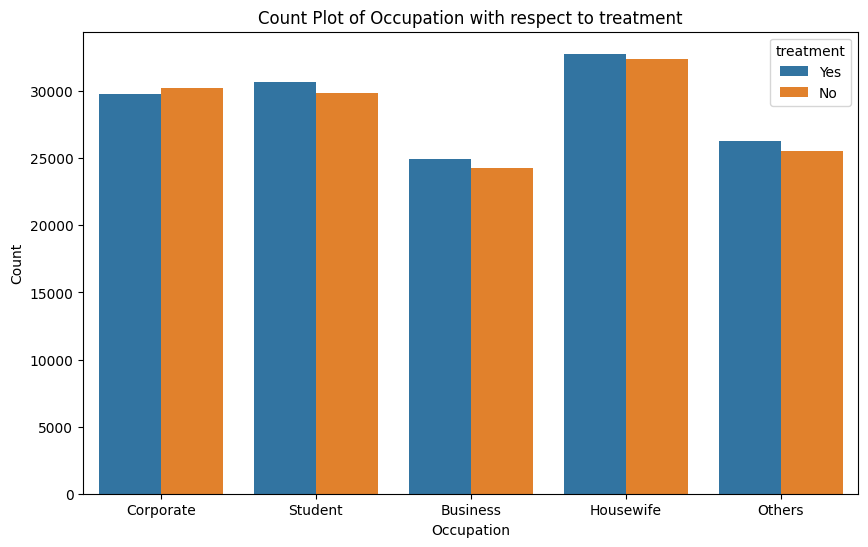

In [ ]:
# occupation with treatment

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', hue='treatment')
plt.title("Count Plot of Occupation with respect to treatment")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()



## Observation

- Housewives are the most category to recieve treatment.
- Students are the second most category to recieve treatment.
- all categories's responses (yes/no) are very close to each other

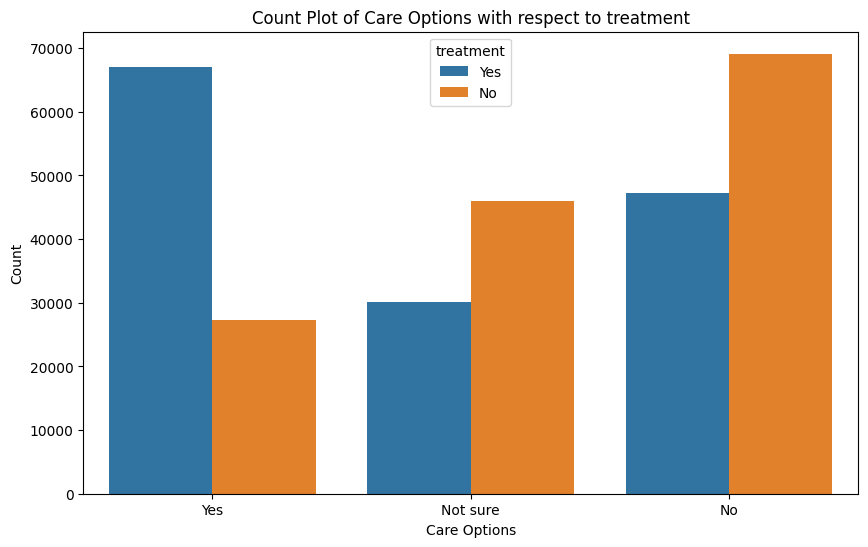

In [ ]:
# occupation with treatment

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='care_options', hue='treatment')
plt.title("Count Plot of Care Options with respect to treatment")
plt.xlabel("Care Options")
plt.ylabel("Count")
plt.show()



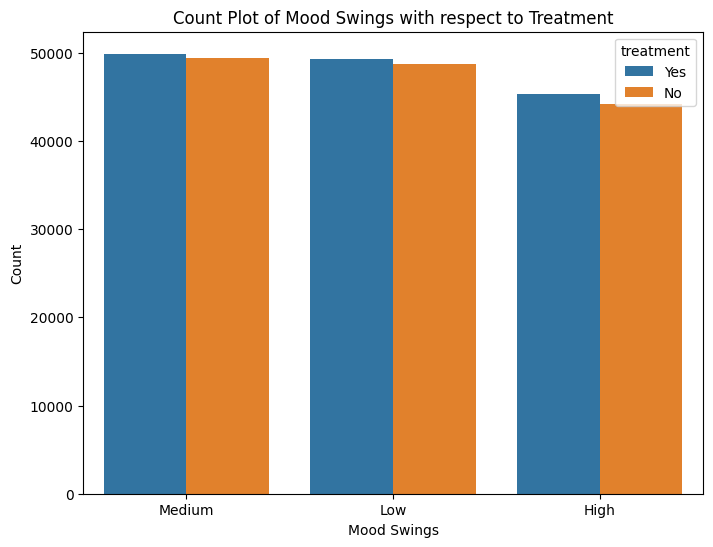

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Mood_Swings', hue='treatment')
plt.title("Count Plot of Mood Swings with respect to Treatment")
plt.xlabel("Mood Swings")
plt.ylabel("Count")
plt.show()


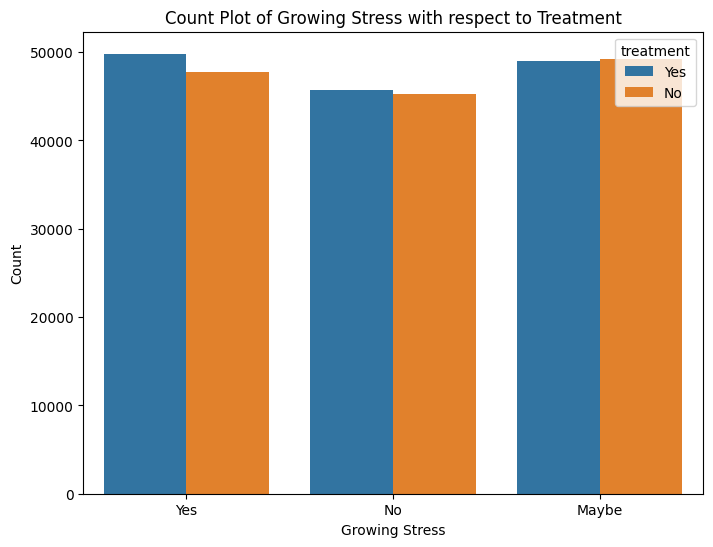

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Growing_Stress', hue='treatment')
plt.title("Count Plot of Growing Stress with respect to Treatment")
plt.xlabel("Growing Stress")
plt.ylabel("Count")
plt.show()


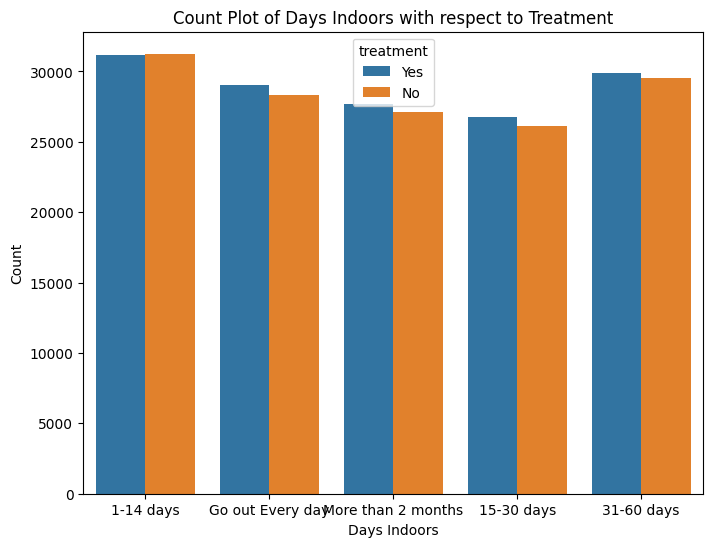

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Days_Indoors', hue='treatment')
plt.title("Count Plot of Days Indoors with respect to Treatment")
plt.xlabel("Days Indoors")
plt.ylabel("Count")
plt.show()


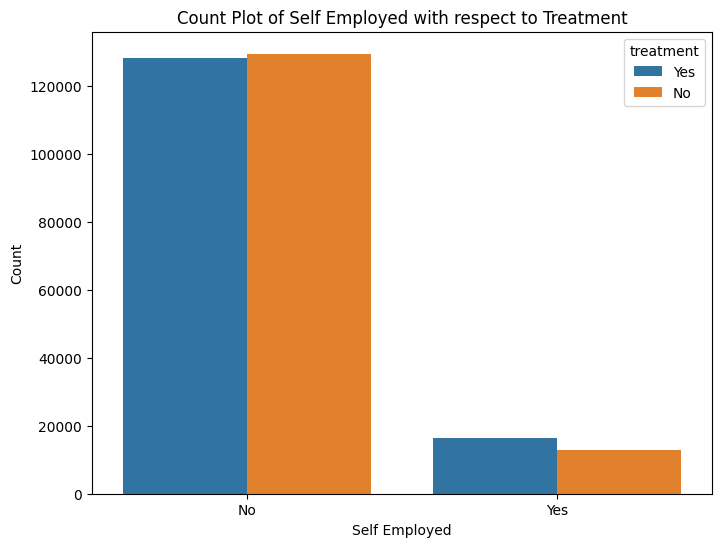

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='self_employed', hue='treatment')
plt.title("Count Plot of Self Employed with respect to Treatment")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.show()


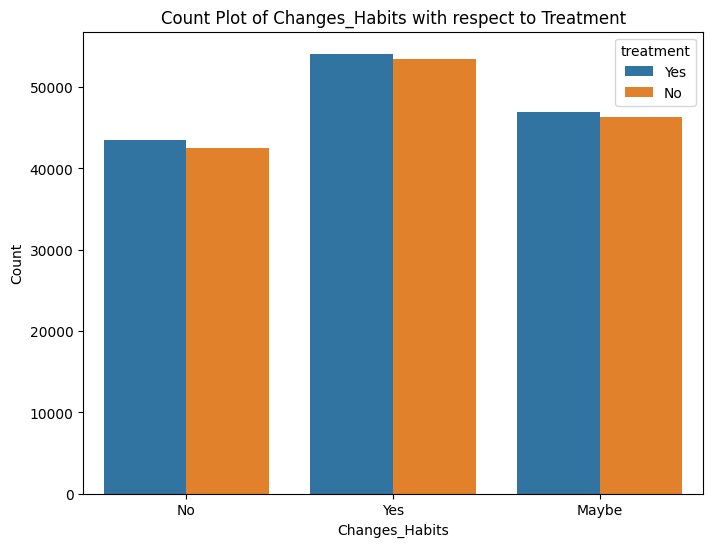

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Changes_Habits', hue='treatment')
plt.title("Count Plot of Changes_Habits with respect to Treatment")
plt.xlabel("Changes_Habits")
plt.ylabel("Count")
plt.show()


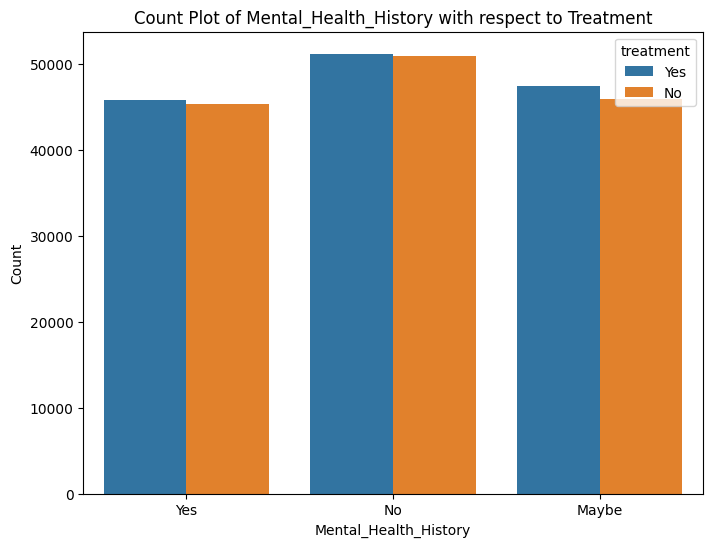

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Mental_Health_History', hue='treatment')
plt.title("Count Plot of Mental_Health_History with respect to Treatment")
plt.xlabel("Mental_Health_History")
plt.ylabel("Count")
plt.show()

In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


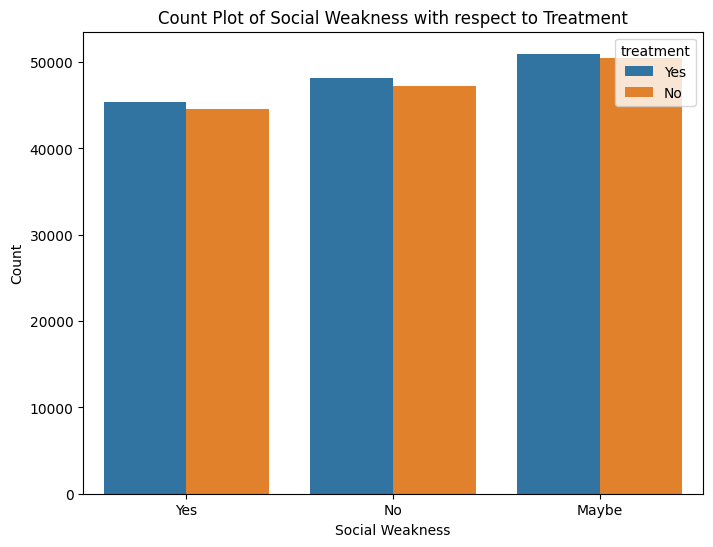

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Social_Weakness', hue='treatment')
plt.title("Count Plot of Social Weakness with respect to Treatment")
plt.xlabel("Social Weakness")
plt.ylabel("Count")
plt.show()


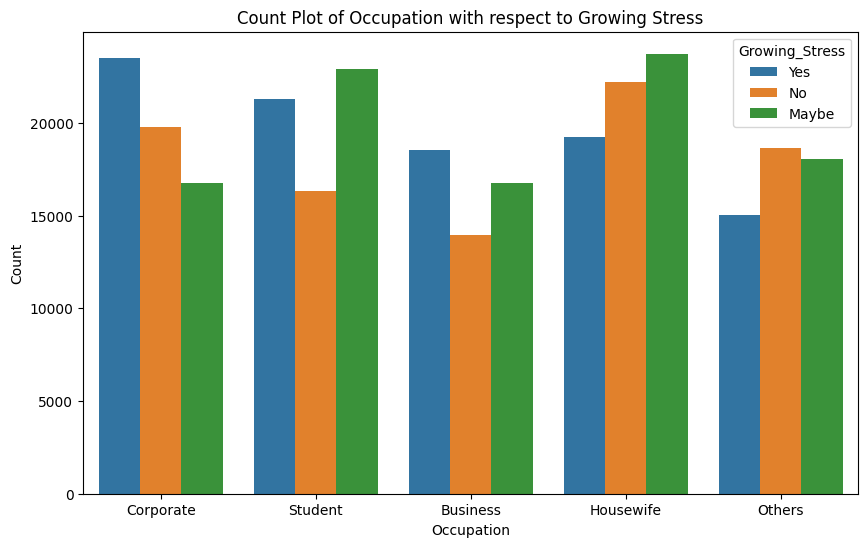

In [ ]:
# occupation with growing stress

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', hue='Growing_Stress')
plt.title("Count Plot of Occupation with respect to Growing Stress")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()



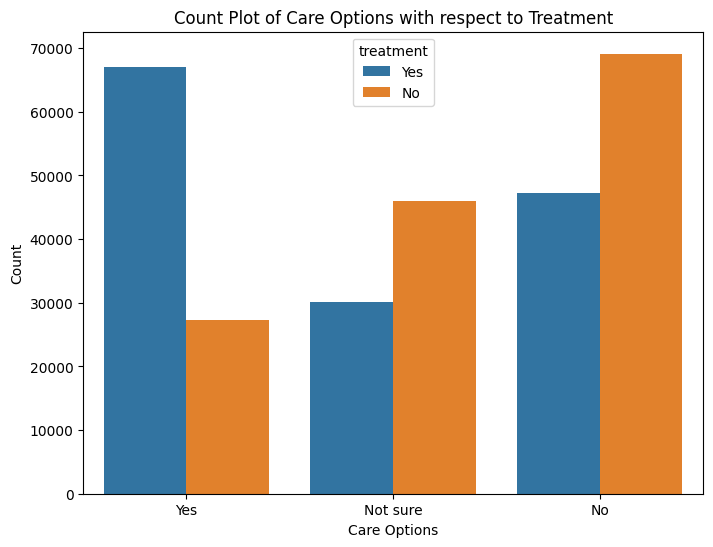

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='care_options', hue='treatment')
plt.title("Count Plot of Care Options with respect to Treatment")
plt.xlabel("Care Options")
plt.ylabel("Count")
plt.show()


we can remove mood swings, work interest, occupation, self-employed and mental health interview, Days Indoors, country, social weakness

Observtion
Corporates are the most category experiencing growing stress

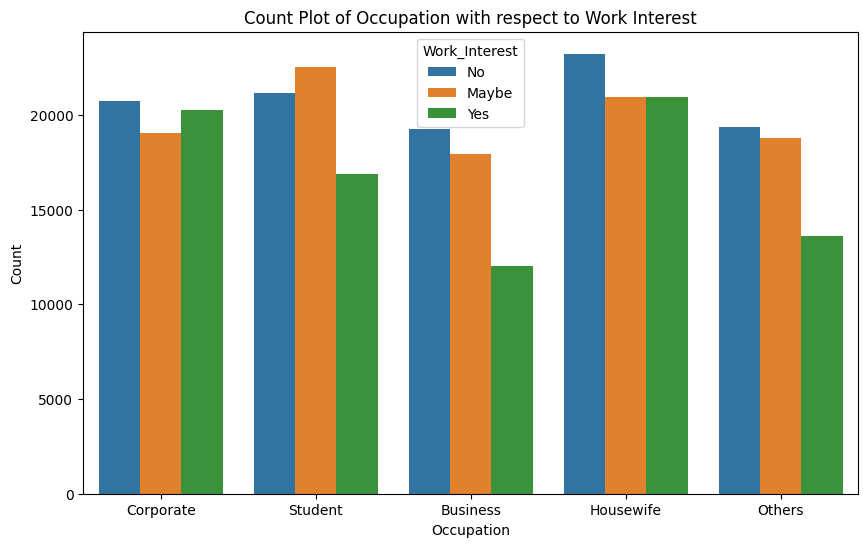

In [ ]:
# occupation with treatment

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', hue='Work_Interest')
plt.title("Count Plot of Occupation with respect to Work Interest")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()



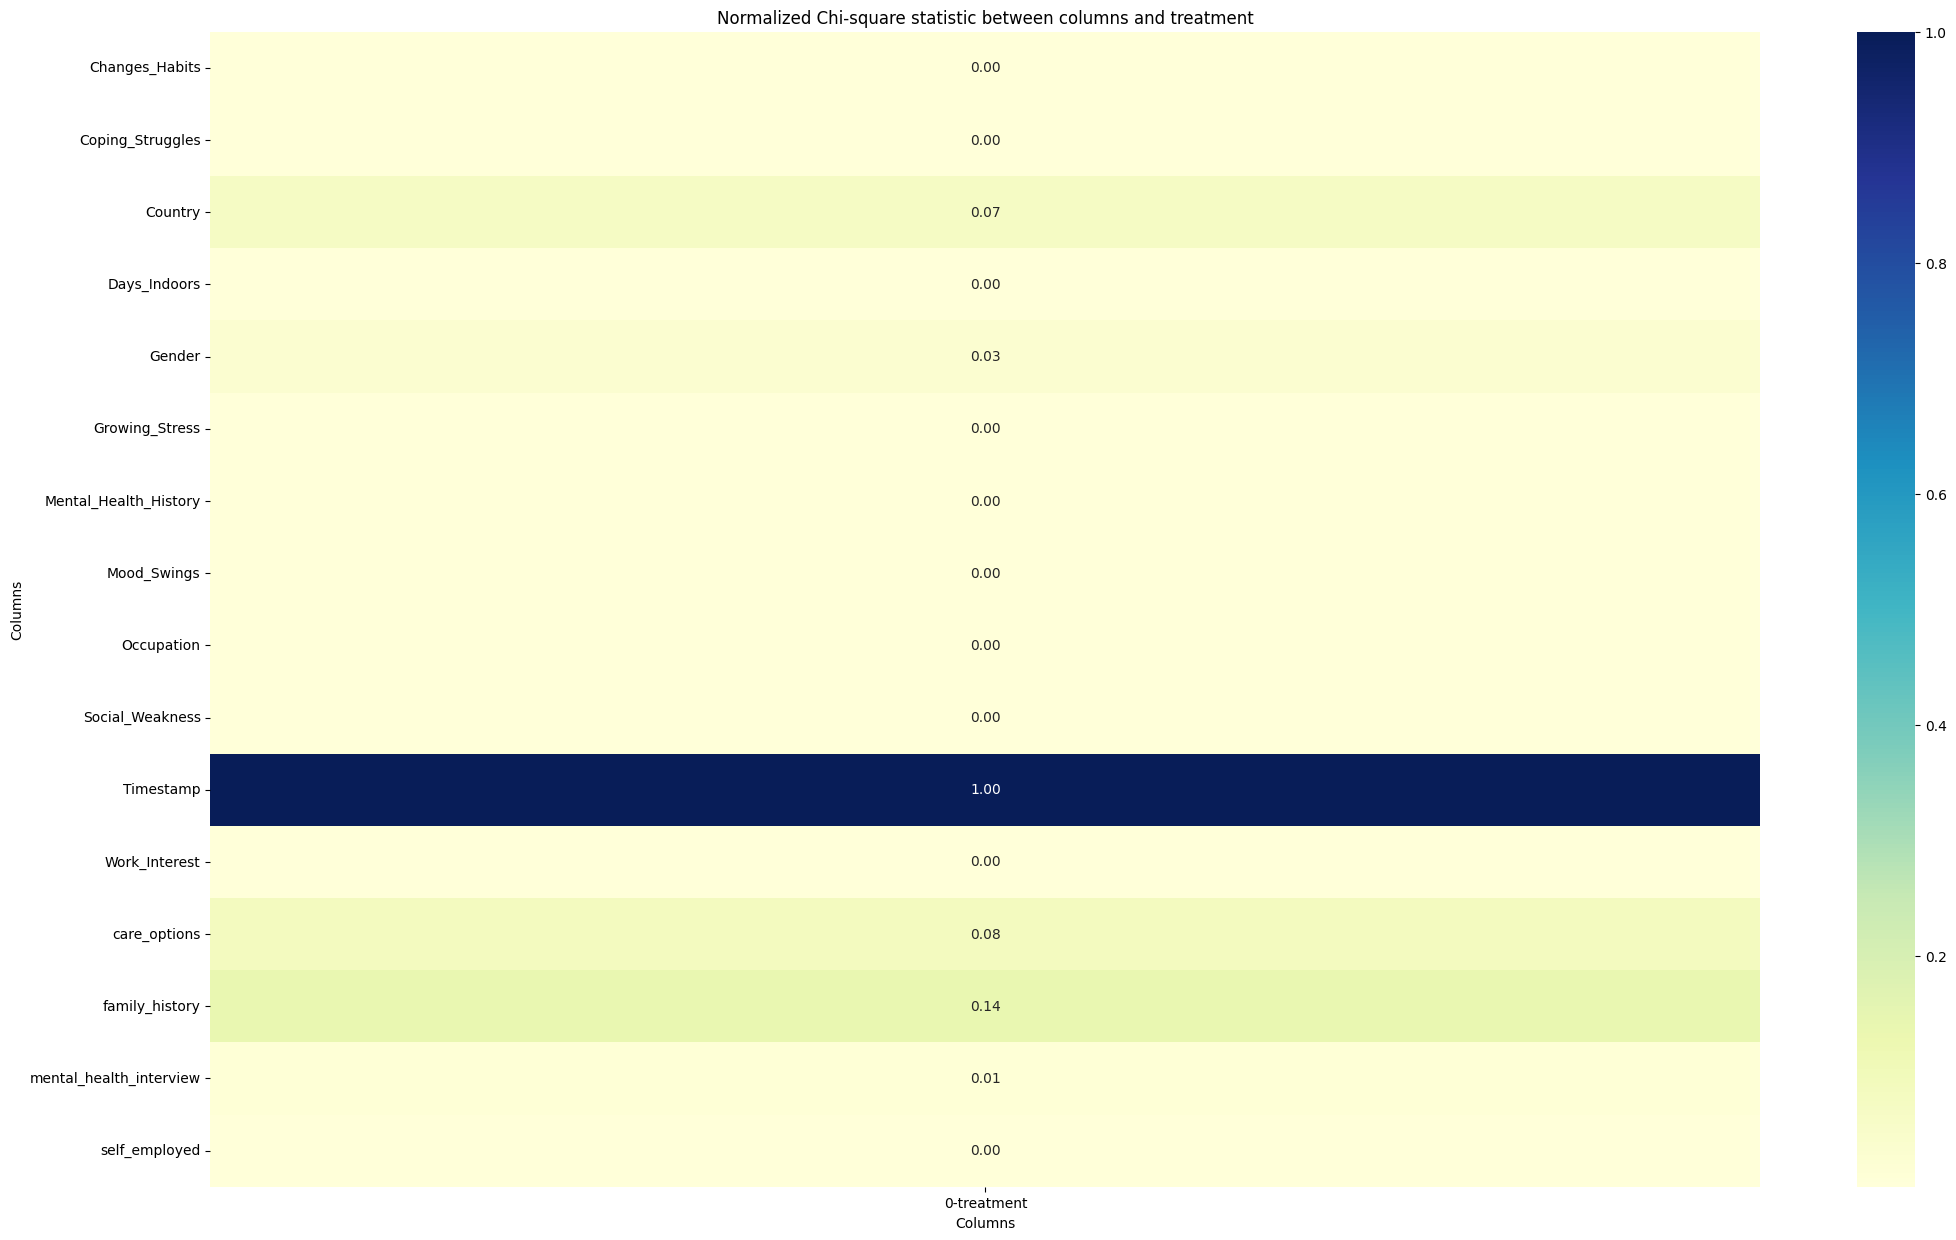

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
chi2_results = {}
max_chi2 = 0
for col1 in df.columns:
    if col1 != "treatment":
        contingency_table = pd.crosstab(df[col1], df["treatment"])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        chi2_results[(col1, "treatment")] = chi2
        max_chi2 = max(max_chi2, chi2)

# Normalize chi-square statistics to the range [0, 1]
normalized_chi2_results = {k: v / max_chi2 for k, v in chi2_results.items()}

# Create a DataFrame from normalized chi-square results
chi2_df = pd.DataFrame(normalized_chi2_results.values(), index=pd.MultiIndex.from_tuples(normalized_chi2_results.keys())).unstack()

# Plotting a heatmap of chi-square statistics
plt.figure(figsize=(25, 15))
sns.heatmap(chi2_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title('Normalized Chi-square statistic between columns and treatment')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()


#Feature encoding

In [ ]:
df=pd.read_csv("Cleaned Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


we can remove work interest, occupation, self-employed and mental health interview, Days Indoors, country, social weakness

In [ ]:
import pandas as pd

# Sample DataFrame with categorical features and a target variable
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[[ 'self_employed', 'Occupation','family_history', 'Work_Interest', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Social_Weakness', 'mental_health_interview', 'care_options']])

mapping = {'Yes': 1, 'No': 0}

# Concatenate the encoded features with the target variable
df_encoded['treatment'] = df['treatment'].map(mapping)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()
correlation_matrix



,self_employed_No,self_employed_Yes,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,family_history_No,family_history_Yes,Work_Interest_Maybe,...,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes,treatment
self_employed_No,1.000000,-1.000000,0.000926,-0.002964,-0.000324,0.001310,0.001197,0.011207,-0.011207,-0.000762,...,-0.000797,0.000543,0.000270,-0.060281,0.067729,-0.026406,0.019446,0.037838,-0.055871,-0.036743
self_employed_Yes,-1.000000,1.000000,-0.000926,0.002964,0.000324,-0.001310,-0.001197,-0.011207,0.011207,0.000762,...,0.000797,-0.000543,-0.000270,0.060281,-0.067729,0.026406,-0.019446,-0.037838,0.055871,0.036743
Occupation_Business,0.000926,-0.000926,1.000000,-0.234290,-0.246913,-0.213710,-0.235597,-0.002796,0.002796,0.017384,...,-0.057524,0.011813,0.047279,-0.001413,0.001647,-0.000765,-0.001699,0.000852,0.000976,0.002415
Occupation_Corporate,-0.002964,0.002964,-0.234290,1.000000,-0.279023,-0.241502,-0.266236,0.008953,-0.008953,-0.031204,...,0.058415,-0.041159,-0.018399,0.004523,-0.005272,0.002449,0.005441,-0.002728,-0.003123,-0.007733
Occupation_Housewife,-0.000324,0.000324,-0.246913,-0.279023,1.000000,-0.254513,-0.280580,0.000978,-0.000978,-0.027829,...,-0.047318,0.013011,0.035545,0.000494,-0.000576,0.000268,0.000595,-0.000298,-0.000341,-0.000845
Occupation_Others,0.001310,-0.001310,-0.213710,-0.241502,-0.254513,1.000000,-0.242849,-0.003956,0.003956,0.016717,...,0.004450,0.044271,-0.049538,-0.001999,0.002330,-0.001082,-0.002404,0.001206,0.001380,0.003417
Occupation_Student,0.001197,-0.001197,-0.235597,-0.266236,-0.280580,-0.242849,1.000000,-0.003617,0.003617,0.027859,...,0.039315,-0.024967,-0.015160,-0.001827,0.002130,-0.000989,-0.002198,0.001102,0.001262,0.003124
family_history_No,0.011207,-0.011207,-0.002796,0.008953,0.000978,-0.003956,-0.003617,1.000000,-1.000000,0.002303,...,0.002406,-0.001639,-0.000815,0.043905,-0.054970,0.033109,0.067349,0.081385,-0.146850,-0.371386
family_history_Yes,-0.011207,0.011207,0.002796,-0.008953,-0.000978,0.003956,0.003617,-1.000000,1.000000,-0.002303,...,-0.002406,0.001639,0.000815,-0.043905,0.054970,-0.033109,-0.067349,-0.081385,0.146850,0.371386
Work_Interest_Maybe,-0.000762,0.000762,0.017384,-0.031204,-0.027829,0.016717,0.027859,0.002303,-0.002303,1.000000,...,-0.015750,0.011085,0.004974,0.001164,-0.001356,0.000630,0.001400,-0.000702,-0.000803,-0.001989


In [ ]:
def drop_irrelevant_columns(df):
    df.drop('Timestamp', axis = 1, inplace=True)
    df.drop("Country", axis = 1,  inplace=True)
    df.drop("Work_Interest", axis = 1,inplace=True)
    df.drop("self_employed", axis = 1, inplace=True)
    df.drop("mental_health_interview", axis = 1, inplace=True)
    df.drop("Social_Weakness", axis = 1, inplace=True)
    df.drop("Days_Indoors", axis = 1, inplace=True)
    df.drop("Occupation", axis = 1, inplace=True)
    df.drop("Changes_Habits", axis = 1, inplace=True)
    return df

In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
def encode_data(df):

    mapping = {'Female': 1, 'Male': 0}

# Map the values in the column using the mapping dictionary
    df['Gender'] = df['Gender'].map(mapping)
    mapping = {'Yes': 1, 'No': 0}

    df['family_history'] = df['family_history'].map(mapping)
    df['treatment'] = df['treatment'].map(mapping)
    df['Coping_Struggles'] = df['Coping_Struggles'].map(mapping)
    unique_values_columns = dict()
    for col in df.columns:
        if len(df[col].unique()) >2:
            unique_values_columns[col] = df[col].unique()

    columns_to_encode = unique_values_columns.keys()
    df_encoded = pd.get_dummies(df[columns_to_encode], dtype = int)

    # Concatenate the one-hot encoded columns with the original DataFrame
    df_result = pd.concat([df.drop(columns_to_encode, axis=1), df_encoded], axis=1)

    return df_result

In [ ]:
def feature_encoding(df):
    df = drop_irrelevant_columns(df)
    df_result = encode_data(df)
    return df_result

In [ ]:
def encode_data_infer(df):
    mapping = {'Female': 1, 'Male': 0}
    df["Gender"] = mapping[df["Gender"].tolist()[0]]
    mapping = {'Yes': 1, 'No': 0}
    df["family_history"] = mapping[df["family_history"].tolist()[0]]
    df["treatment"] = mapping[df["treatment"].tolist()[0]]
    df["Coping_Struggles"] = mapping[df["Coping_Struggles"].tolist()[0]]
    columns_to_encode = ["Growing_Stress", "Mental_Health_History", "Mood_Swings", "care_options"]
    test_encoded = pd.get_dummies(df[columns_to_encode], dtype = int)
    test_encoded = test_encoded.reindex(columns=columns_order, fill_value=0)
    return test_encoded

In [ ]:
def feature_encoding_infer(df):
    df.dropna(inplace = True)
    df.drop_duplicates(inplace = True)
    if isinstance(df, pd.DataFrame) and not df.empty:
        df = drop_irrelevant_columns(df)
        df_result = encode_data_infer(df)
        return df_result
    else:
        return "df contained nulls"

In [ ]:
df_result = feature_encoding(df)
df_result.head()


,Gender,family_history,treatment,Coping_Struggles,Growing_Stress_Maybe,Growing_Stress_No,Growing_Stress_Yes,Mental_Health_History_Maybe,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium,care_options_No,care_options_Not sure,care_options_Yes
0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1
1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0


In [ ]:
global columns_order
columns_order = df_result.columns

In [ ]:
treatment = df_result["treatment"]
df_result.drop(columns = ["treatment"], inplace = True)
df_result["treatment"] = treatment


In [ ]:
df_result.to_csv("dataset_with_features_encoded.csv", index = False)

# Models

In [ ]:
df = pd.read_csv("dataset_with_features_encoded.csv")
df.head(5)

,Gender,family_history,Coping_Struggles,Growing_Stress_Maybe,Growing_Stress_No,Growing_Stress_Yes,Mental_Health_History_Maybe,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium,care_options_No,care_options_Not sure,care_options_Yes,treatment
0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1
1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1
2,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1
3,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1
4,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
df.shape

(286808, 16)

In [ ]:
df.head()

,Gender,family_history,Coping_Struggles,Growing_Stress_Maybe,Growing_Stress_No,Growing_Stress_Yes,Mental_Health_History_Maybe,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium,care_options_No,care_options_Not sure,care_options_Yes,treatment
0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1
1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1
2,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1
3,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1
4,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
X = df  # Features
y = df['treatment']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Naive Bayes Model

In [ ]:
# Define your map function
def mapper(row):
    label = row[-1]
    features = row[:-1] # Exclude the last column (target variable)
    l = []
    for i, value in enumerate(features):
        l.append(((i, value, label), 1))

    return l


# Define your reduce function
def reducer(mapped_values):
    flat_list = [inner_list for outer_list in mapped_values for inner_list in outer_list]
    for key_value_label, count in flat_list:
        counts[key_value_label] += count




# Define a thread worker for mapping
def map_worker(data_slice, result, lock):
    mapped_values = []
    for _, row in data_slice.iterrows():
        mapped_values.append(mapper(np.array(row)))

    with lock:
        result.extend(mapped_values)



# Define a thread worker for reducing
def reduce_worker(mapped_values, result, lock):
    with lock:
        reducer(mapped_values)


# Perform MapReduce using threads
def map_reduce(data, num_threads, chunk_size):
    result = []
    lock = threading.Lock()


    # Map phase
    map_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(data)
        thread = threading.Thread(target=map_worker, args=(data[start_idx:end_idx], result, lock))
        map_threads.append(thread)
        thread.start()

    for thread in map_threads:
        thread.join()

    # Reduce phase
    reduced_result = []
    reduce_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(result)
        thread = threading.Thread(target=reduce_worker, args=(result[start_idx:end_idx], reduced_result, lock))
        reduce_threads.append(thread)
        thread.start()

    for thread in reduce_threads:
        thread.join()



In [ ]:
# Define your map function
def mapper_label(row):
    return (row[-1], 1)


# Define your reduce function
def reducer_label(mapped_values):
    for key_value_label, count in mapped_values:
        counts_label[key_value_label] += count



# Define a thread worker for mapping
def map_worker_label(data_slice, result, lock):
    mapped_values = []
    for _, row in data_slice.iterrows():
        mapped_values.append(mapper_label(np.array(row)))

    with lock:
        result.extend(mapped_values)



# Define a thread worker for reducing
def reduce_worker_label(mapped_values, result, lock):
    with lock:
        reducer_label(mapped_values)



# Perform MapReduce using threads
def map_reduce_label(data, num_threads, chunk_size):
    result = []
    lock = threading.Lock()


    # Map phase
    map_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(data)
        thread = threading.Thread(target=map_worker_label, args=(data[start_idx:end_idx], result, lock))
        map_threads.append(thread)
        thread.start()

    for thread in map_threads:
        thread.join()

    # Reduce phase
    reduced_result = []
    reduce_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(result)
        thread = threading.Thread(target=reduce_worker_label, args=(result[start_idx:end_idx], reduced_result, lock))
        reduce_threads.append(thread)
        thread.start()

    for thread in reduce_threads:
        thread.join()



In [ ]:
def mapper_test(r):
    conditional_probability = []

    row = r[:-1] # Exclude the last column (target variable)
    y_true = r[-1]
    temp = []
    for i, e in enumerate(row):
        prob_1 = counts[(i,e,1)]/counts_label[1]
        prob_0 = counts[(i,e,0)]/counts_label[0]
        temp.append((prob_0,prob_1))
    conditional_probability.append([temp, y_true])

    return conditional_probability # for each row


# Define your reduce function
def reducer_test(mapped_values):
    y0_prob = 1
    y1_prob = 1

    total_pred = []
    for row in mapped_values: # rows
        r = row[0][0]
        first_elements = [tup[0] for tup in r]
        second_elements = [tup[1] for tup in r]

        for x in first_elements:
            y0_prob*= x

        for x in second_elements:
            y1_prob*= x

        y0_prob /= counts_label[0] # count of y = 0
        y1_prob /= counts_label[1] # count of y = 1

        y0_prob *= (counts_label[0]/(counts_label[1]+ counts_label[0]))# prob of y = 0
        y1_prob *= (counts_label[1]/(counts_label[1]+ counts_label[0]))# prob of y = 1


        if y0_prob > y1_prob:
            total_pred.append((0, row[0][1]))
        else:
            total_pred.append((1, row[0][1]))

    return total_pred




# Define a thread worker for mapping
def map_worker_test(data_slice, result, lock):
    mapped_values = []
    for _, row in data_slice.iterrows():
        mapped_values.append(mapper_test(np.array(row)))

    with lock:
        result.extend(mapped_values)



# Define a thread worker for reducing
def reduce_worker_test(mapped_values, result, lock):
    with lock:
        result = reducer_test(mapped_values)
        final_pred.extend(result)

# Perform MapReduce using threads
def map_reduce_test(data, num_threads, chunk_size):
    result = []
    lock = threading.Lock()


    # Map phase
    map_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(data)
        thread = threading.Thread(target=map_worker_test, args=(data[start_idx:end_idx], result, lock))
        map_threads.append(thread)
        thread.start()

    for thread in map_threads:
        thread.join()

    # Reduce phase
    reduced_result = []
    reduce_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(result)
        thread = threading.Thread(target=reduce_worker_test, args=(result[start_idx:end_idx], reduced_result, lock))
        reduce_threads.append(thread)
        thread.start()

    for thread in reduce_threads:
        thread.join()




In [ ]:
def mapper_infer(r):
    conditional_probability = []

    row = r # Exclude the last column (target variable)
    # y_true = r[-1]
    temp = []
    for i, e in enumerate(row):
        prob_1 = counts[(i,e,1)]/counts_label[1]
        prob_0 = counts[(i,e,0)]/counts_label[0]
        temp.append((prob_0,prob_1))
    conditional_probability.append(temp)

    return conditional_probability # for each row


# Define your reduce function
def reducer_infer(mapped_values):
    # print(mapped_values)
    y0_prob = 1
    y1_prob = 1

    total_pred = []
    for row in mapped_values: # rows
        r = row[0]
        first_elements = [tup[0] for tup in r]
        second_elements = [tup[1] for tup in r]

        for x in first_elements:
            y0_prob*= x

        for x in second_elements:
            y1_prob*= x

        y0_prob /= counts_label[0] # count of y = 0
        y1_prob /= counts_label[1] # count of y = 1

        y0_prob *= (counts_label[0]/(counts_label[1]+ counts_label[0]))# prob of y = 0
        y1_prob *= (counts_label[1]/(counts_label[1]+ counts_label[0]))# prob of y = 1


        if y0_prob > y1_prob:
            total_pred.append(0)
        else:
            total_pred.append(1)

    return total_pred




# Define a thread worker for mapping
def map_worker_infer(data_slice, result, lock):
    mapped_values = []
    for _, row in data_slice.iterrows():
        mapped_values.append(mapper_infer(np.array(row)))

    with lock:
        result.extend(mapped_values)



# Define a thread worker for reducing
def reduce_worker_infer(mapped_values, result, lock):
    with lock:
        result = reducer_infer(mapped_values)
        infer_y.extend(result)

# Perform MapReduce using threads
def map_reduce_infer(data, num_threads, chunk_size):
    result = []
    lock = threading.Lock()


    # Map phase
    map_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(data)
        thread = threading.Thread(target=map_worker_infer, args=(data[start_idx:end_idx], result, lock))
        map_threads.append(thread)
        thread.start()

    for thread in map_threads:
        thread.join()

    # Reduce phase
    reduced_result = []
    reduce_threads = []
    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_threads - 1 else len(result)
        thread = threading.Thread(target=reduce_worker_infer, args=(result[start_idx:end_idx], reduced_result, lock))
        reduce_threads.append(thread)
        thread.start()

    for thread in reduce_threads:
        thread.join()




In [ ]:
counts = defaultdict(int)
counts_label = defaultdict(int)
final_pred = []
infer_y= []

def Naive_Bayes(data, mode):
    if mode == "Train":
        global counts
        global counts_label
        print("training..")
        map_reduce(data, num_threads = 300, chunk_size=200)
        map_reduce_label(data, num_threads = 300, chunk_size=200)
        print("finish training 👍")
        return counts, counts_label

    elif mode == "Test":
        print("testing..")
        global final_pred
        map_reduce_test(data, num_threads = 100, chunk_size=200)
        true_label = []
        pred_label = []
        for r in final_pred:
            pred_label.append(r[0])
            true_label.append(r[1])
        a = accuracy_score(true_label, pred_label)
        p = precision_score(true_label, pred_label)
        r = recall_score(true_label, pred_label)
        f1 = f1_score(true_label, pred_label)
        cm = confusion_matrix(true_label, pred_label)
        print("finished testing 👍")
        return a, p, r, f1, cm

    elif mode == "Infer":
        global infer_y
        map_reduce_infer(data, num_threads = 1, chunk_size = 1)
        return infer_y
    else:
        return "wrong input"

In [ ]:
counts, counts_label = Naive_Bayes(X_train, "Train")
print(counts)
print(counts_label)

training..
finish training 👍
defaultdict(<class 'int'>, {(0, 0, 1): 98555, (1, 0, 1): 55348, (2, 1, 1): 62106, (3, 0, 1): 85934, (4, 0, 1): 88964, (5, 1, 1): 44841, (6, 0, 1): 87282, (7, 1, 1): 46137, (8, 0, 1): 88912, (9, 1, 1): 40826, (10, 0, 1): 85719, (11, 0, 1): 85164, (12, 0, 1): 87407, (13, 0, 1): 102983, (14, 1, 1): 60333, (2, 0, 1): 67951, (3, 1, 1): 44123, (5, 0, 1): 85216, (6, 1, 1): 42775, (7, 0, 1): 83920, (9, 0, 1): 89231, (10, 1, 1): 44338, (8, 1, 1): 41145, (12, 1, 1): 42650, (14, 0, 1): 69724, (0, 0, 0): 113734, (1, 0, 0): 100934, (2, 1, 0): 59866, (3, 0, 0): 83865, (4, 1, 0): 40763, (5, 0, 0): 84968, (6, 0, 0): 86709, (7, 1, 0): 45884, (8, 0, 0): 87245, (9, 0, 0): 88345, (10, 0, 0): 84207, (11, 1, 0): 44482, (12, 0, 0): 65740, (13, 0, 0): 86755, (14, 1, 0): 24425, (3, 1, 0): 44205, (4, 0, 0): 87307, (6, 1, 0): 41361, (7, 0, 0): 82186, (10, 1, 0): 43863, (11, 0, 0): 83588, (12, 1, 0): 62330, (14, 0, 0): 103645, (0, 1, 0): 14336, (2, 0, 0): 68204, (1, 1, 1): 74709, (4, 

In [ ]:
a, p, r, f1, cm = Naive_Bayes(X_test, "Test")
print("Naive Bayes Results: ")
print("accuracy = ",a)
print("precision =", p)
print("recall = ", r)
print("f1 score =", f1)
print("confusion matrix = ", cm)

testing..
finished testing 👍
Naive Bayes Results: 
accuracy =  0.5102332554652906
precision = 0.5073483137748491
recall =  0.9488368872888396
f1 score = 0.6611669923052801
confusion matrix =  [[  929 13308]
 [  739 13705]]


In [ ]:
df_infer = feature_encoding_infer(pd.read_csv("input_data.csv"))
df_infer.drop(columns = ["treatment"], inplace = True)

In [ ]:
out = Naive_Bayes(df_infer, "Infer")
out

[0]

## Other Models

In [ ]:
X_train = X_train.drop(columns = ["treatment"]) # Features
X_test = X_test.drop(columns = ["treatment"])
# y = y  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Result for Random Forest: ")
print("Accuracy:", accuracy)
print("precision =", p)
print("recall = ", r)
print("f1 score =", f1)
print("confusion matrix = ", cm)

Result for Random Forest: 
Accuracy: 0.7110630731146055
precision = 0.6900425952219272
recall =  0.7738853503184714
f1 score = 0.7295630323401756
confusion matrix =  [[ 9216  5021]
 [ 3266 11178]]


Logistic Regression

In [ ]:
logreg_classifier = LogisticRegression()

logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Result for Logistic Regression: ")
print("Accuracy:", accuracy)
print("precision =", p)
print("recall = ", r)
print("f1 score =", f1)
print("confusion matrix = ", cm)


Result for Logistic Regression: 
Accuracy: 0.7113420034168962
precision = 0.6903835464146748
recall =  0.7738853503184714
f1 score = 0.7297535498612698
confusion matrix =  [[ 9224  5013]
 [ 3266 11178]]


In [ ]:

y_pred = logreg_classifier.predict(df_infer)
y_pred

array([0])

In [ ]:

y_pred = rf_classifier.predict(df_infer)
y_pred

array([0])